In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Data loading
file_path = ("Resources/Myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Drop MYOPIC column to avoid bias
df_myopia = df.drop(columns = ["MYOPIC"])
df_myopia.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Find null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values.")


Column AGE has 0 null values.
Column SPHEQ has 0 null values.
Column AL has 0 null values.
Column ACD has 0 null values.
Column LT has 0 null values.
Column VCD has 0 null values.
Column SPORTHR has 0 null values.
Column READHR has 0 null values.
Column COMPHR has 0 null values.
Column STUDYHR has 0 null values.
Column TVHR has 0 null values.
Column DIOPTERHR has 0 null values.
Column MOMMY has 0 null values.
Column DADMY has 0 null values.


In [5]:
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")



Duplicate entries: 0


In [6]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia)
DataFrameX = pd.DataFrame(scaled_data, columns = df_myopia.columns)
DataFrameX.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [7]:
# Initialize PCA model
pca = PCA(n_components = 0.9)

# Get two principal components for the data
myopia_pca = pca.fit_transform(scaled_data)


     

In [8]:
tsne = TSNE(learning_rate = 250)
myopia_tsne = tsne.fit_transform(myopia_pca)


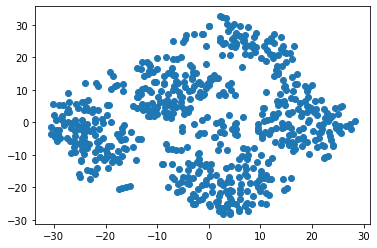

In [9]:
plt.scatter(myopia_tsne[:, 0], myopia_tsne[:, 1])
plt.show()


In [10]:
inertia = []
k = list(range(1, 11))

# Calculate the intertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(myopia_tsne)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve data
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()



,k,inertia
0,1,258719.046875
1,2,156774.281250
2,3,89063.507812
3,4,55978.984375
4,5,38970.375000


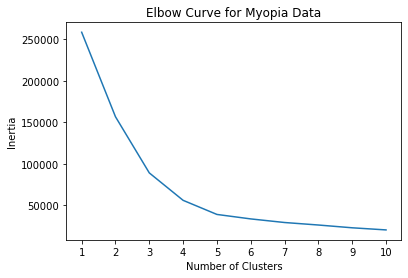

In [11]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Myopia Data")
plt.show()


In [12]:
tsne_df = pd.DataFrame(myopia_tsne, columns = ["Principal Component 1", "Principal Component 2"])
tsne_df.head()


     

,Principal Component 1,Principal Component 2
0,6.479973,-10.185402
1,19.766884,4.340090
2,-22.008627,-0.008924
3,-10.694708,12.548979
4,-6.824412,-17.282320


In [13]:
def get_clusters(k, data):
    
    # Initialize the K-Means model
    model = KMeans(n_clusters = k, random_state = 0)
    
    # Train the model
    model.fit(data)
    
    # Predict Clusters
    predictions = model.predict(data)
    
    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    
    return data


In [14]:
get_clusters(3, tsne_df)

,Principal Component 1,Principal Component 2,class
0,6.479973,-10.185402,0
1,19.766884,4.340090,0
2,-22.008627,-0.008924,2
3,-10.694708,12.548979,1
4,-6.824412,-17.282320,0
...,...,...,...
613,14.641170,-20.725159,0
614,19.472780,4.737846,0
615,20.635532,6.455763,1
616,-17.630676,-8.806770,2


In [15]:
def show_clusters(df):
    plt.scatter(df["Principal Component 1"], df["Principal Component 2"], c = df["class"])
    plt.xlabel(["Pricipal Component 1"])
    plt.ylabel(["Principal Component 2"])
    plt.title("Myopia Clusters")
    plt.show()


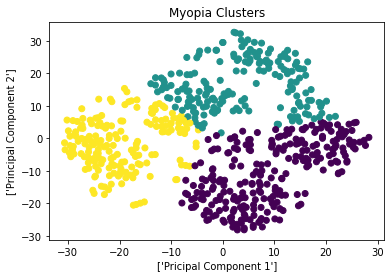

In [16]:
show_clusters(tsne_df)

In [17]:

get_clusters(2, tsne_df)

,Principal Component 1,Principal Component 2,class
0,6.479973,-10.185402,1
1,19.766884,4.340090,0
2,-22.008627,-0.008924,1
3,-10.694708,12.548979,0
4,-6.824412,-17.282320,1
...,...,...,...
613,14.641170,-20.725159,1
614,19.472780,4.737846,0
615,20.635532,6.455763,0
616,-17.630676,-8.806770,1


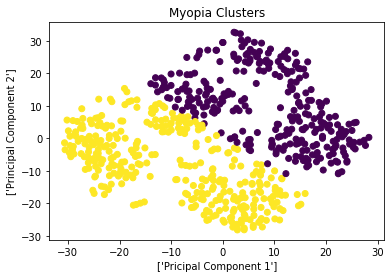

In [18]:
show_clusters (tsne_df)

Analysis - The t - SNE reduction proides two to five clusters. But as per elbow curve the max number of clusters should be 2 or 3. The 2 clusters look more prominenet although elbo curve suggestes 3 clusters can also be effiecient. 